## Bayesian Inference for a Mean  
*Recall:* For Binomial data/likelihood, the *Beta* distributions are conjugate priors.  
**Question:** What to do for a Normal Model $Y_i \stackrel{iid}{\sim} N(\mu, \sigma)$? 
* Data model is chosen: Normal.
* What to do with two parameters $\mu$ and $\sigma$?
* How to specify priors? Do Conjugate priors exist?
---
### Step 0: Import packages:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm, gamma, poisson
from matplotlib.ticker import PercentFormatter

### Step 1: Load Dataset
Download the dataset from [here (monika's github repository)](https://github.com/alanskye/Undergrad-Bayesian-Course/blob/master/Lectures/3-BayesianInferenceMean/CEsample1.csv) and put it under your own directory.

In [10]:
CSV_PATH = 'data/CEsample1.csv'
df = pd.read_csv(CSV_PATH)
tot_exp_lastq = df['TotalExpLastQ'].to_numpy()


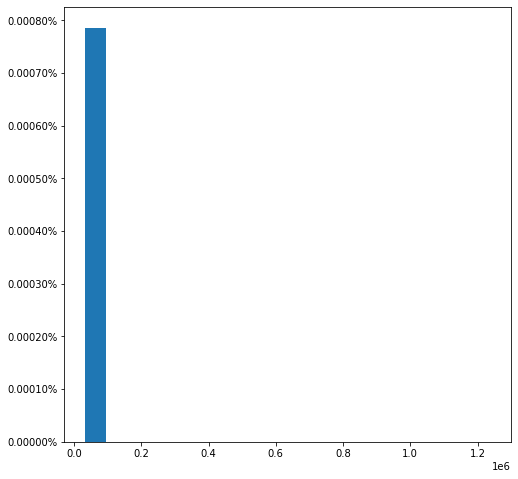

In [11]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
ax.hist(tot_exp_lastq, rwidth=0.5, density=True)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

### Step 2: Log transformation of the variable

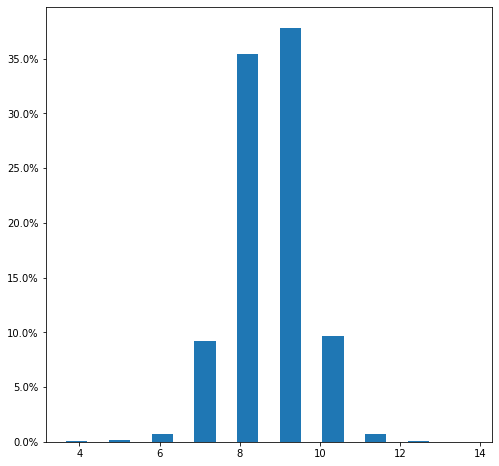

In [15]:
log_tot_exp_lastq = np.log(tot_exp_lastq)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
ax.hist(log_tot_exp_lastq, rwidth=0.5, density=True)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

### Step 3: Simulate posterior draws of $\mu$
If only mean $\mu$ is unknown: *Normal conjugate prior*
* The prior distribution:  
$$\mu|\sigma \stackrel{iid}{\sim} N(\mu, \sigma)$$
* The data model:
$$y_1, ..., y_n | \mu, \sigma \stackrel{iid}{\sim} N(\mu, \sigma)$$
* The posterior distribution:
$$\mu|y_1,...my_n,\phi \sim N\left( \frac{\phi_0\mu_0+n\bar{y}\phi}{\phi_0+n\phi}, \sqrt{\frac{1}{\phi_0+n\phi}} \right) $$
where $\phi=\frac{1}{\sigma^2} \text{ and }\phi_0=\frac{1}{\sigma_0^2}$, the precision.

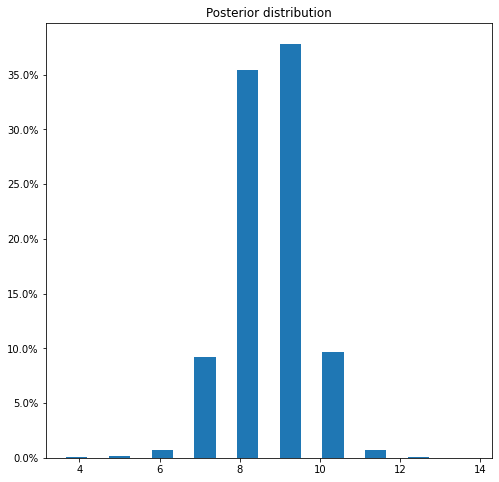

In [29]:
# my prior beliefs
mu_0 = 5
sigma_0 = 1
phi_0 = (1/sigma_0) ** 2

# acquired data from the survey
y_bar = np.mean(log_tot_exp_lastq)
n = len(log_tot_exp_lastq)
phi = 1.25 # assume that sigma is known
mu_n = (phi_0 * mu_0 + n * y_bar * phi) / (phi_0 + n * phi)
sd_n = np.sqrt(1 / (phi_0 + n * phi))

# mu = mean, scale = stdev
mu_post = norm.rvs(loc=mu_n, scale=sd_n, size=1000)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Posterior distribution')
ax.hist(log_tot_exp_lastq, rwidth=0.5, density=True)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

### Step 4: Simulate posterior draws of $\sigma$